In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd

# ---- Loading in the data -----
df_train = pd.read_excel('/content/drive/MyDrive/Masters Thesis/Colab notebook/combined_training_data_.xlsx')
df_val = pd.read_excel('/content/drive/MyDrive/Masters Thesis/Colab notebook/combined_validation_data.xlsx')
df_test = pd.read_excel('/content/drive/MyDrive/Masters Thesis/Colab notebook/combined_test_data.xlsx')

factors = pd.read_csv('/content/drive/MyDrive/Masters Thesis/Colab notebook/fffactors.csv', skiprows=4)
factors = factors[:-1]

In [22]:
df_train.columns

Index(['trading_day', 'IWSS_Equal', 'IWSS_Ratio', 'IWSS_Impurity', 'IWSS_perm',
       'IWSS_SHAP', 'Sentiment_score', 'Date', 'Close', 'High', 'Low', 'Open',
       'Volume', 'VIX', 'return_t', 'return_t+1'],
      dtype='object')

In [23]:
factors.rename(columns={'Unnamed: 0': 'trading_day'}, inplace=True)
factors['trading_day'] = pd.to_datetime(factors['trading_day'], format='%Y%m%d')

In [4]:
factors.columns

Index(['trading_day', 'Mkt-RF', 'SMB', 'HML', 'RF'], dtype='object')

In [24]:
from datetime import datetime

factors['trading_day'] = pd.to_datetime(factors['trading_day'])

merged_train = pd.merge(df_train, factors, on='trading_day')
merged_val = pd.merge(df_val, factors, on='trading_day')
merged_test = pd.merge(df_test, factors, on='trading_day')

In [11]:
merged_train.head()

,trading_day,IWSS_Equal,IWSS_Ratio,IWSS_Impurity,IWSS_perm,IWSS_SHAP,Sentiment_score,Date,Close,High,...,Volume,VIX,return_t,return_t+1,Mkt-RF,SMB,HML,RF,Excess_return_t,Excess_return_t+1
0,2022-01-03,199.868355,291.509061,240.153644,213.866142,188.089337,1.413043e-01,2022-01-03,4796.560059,4796.640137,...,3831020000,16.600000,NaN,-0.000630,0.73,0.33,0.80,0.0,NaN,-0.000630
1,2022-01-04,492.370256,827.258655,634.328175,528.610515,476.196726,2.585366e-01,2022-01-04,4793.540039,4818.620117,...,4683170000,16.910000,-0.000630,-0.019393,-0.29,-0.83,3.64,0.0,-0.000630,-0.019393
2,2022-01-05,-84.144597,-124.989572,-100.847156,-86.830800,-85.296248,-1.842105e-01,2022-01-05,4700.580078,4797.700195,...,4887960000,19.730000,-0.019393,-0.000964,-2.28,-1.45,2.59,0.0,-0.019393,-0.000964
3,2022-01-06,-335.679315,-665.024878,-473.111691,-365.149653,-330.891389,1.914178e-18,2022-01-06,4696.049805,4725.009766,...,4295280000,19.610001,-0.000964,-0.004050,0.00,0.20,1.75,0.0,-0.000964,-0.004050
4,2022-01-07,-118.449064,-115.942913,-114.730205,-110.645108,-132.143373,1.619048e-01,2022-01-07,4677.029785,4707.950195,...,4181510000,18.760000,-0.004050,-0.001441,-0.48,-1.32,2.02,0.0,-0.004050,-0.001441


In [25]:
merged_train['Excess_return_t'] = merged_train['return_t'] - (merged_train['RF'] / 100)
merged_train['Excess_return_t+1'] = merged_train['return_t+1'] - (merged_train['RF'].shift(-1) / 100)

In [10]:
merged_train.describe()

,trading_day,IWSS_Equal,IWSS_Ratio,IWSS_Impurity,IWSS_perm,IWSS_SHAP,Sentiment_score,Date,Close,High,...,Volume,VIX,return_t,return_t+1,Mkt-RF,SMB,HML,RF,Excess_return_t,Excess_return_t+1
count,460,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460,460.000000,460.000000,...,4.600000e+02,460.000000,459.000000,460.000000,460.000000,460.000000,460.000000,460.000000,459.000000,459.000000
mean,2022-12-01 22:38:36.521739008,63.112399,118.067693,85.819882,67.392522,63.461935,0.012708,2022-12-01 22:38:36.521739008,4157.167831,4186.685107,...,4.347781e+09,21.954609,-0.000213,-0.000190,-0.031413,-0.029652,0.023457,0.011615,-0.000329,-0.000329
min,2022-01-03 00:00:00,-2133.926797,-3634.114086,-2776.258042,-2314.440102,-2028.735818,-0.450943,2022-01-03 00:00:00,3577.030029,3608.340088,...,1.706460e+09,12.820000,-0.043237,-0.043237,-4.290000,-1.820000,-3.870000,0.000000,-0.043327,-0.043327
25%,2022-06-16 18:00:00,-117.142628,-176.131829,-134.668576,-119.462086,-114.292547,-0.092233,2022-06-16 18:00:00,3958.500000,3981.382385,...,3.827798e+09,17.852500,-0.007438,-0.007429,-0.832500,-0.472500,-0.580000,0.003000,-0.007511,-0.007511
50%,2022-11-30 12:00:00,25.759568,45.338866,36.844728,28.658729,24.588982,0.013629,2022-11-30 12:00:00,4137.135010,4159.770020,...,4.153785e+09,21.350000,-0.000712,-0.000708,-0.050000,-0.030000,0.005000,0.015000,-0.000785,-0.000785
75%,2023-05-17 06:00:00,169.218295,291.281819,221.932096,178.847941,168.287410,0.112784,2023-05-17 06:00:00,4380.667358,4410.484985,...,4.685468e+09,25.862501,0.007350,0.007439,0.770000,0.330000,0.682500,0.018000,0.007168,0.007168
max,2023-10-31 00:00:00,4858.688140,8154.718384,6225.550213,5129.417276,4854.385778,1.000000,2023-10-31 00:00:00,4796.560059,4818.620117,...,9.354280e+09,36.450001,0.055434,0.055434,5.680000,2.120000,3.640000,0.022000,0.055294,0.055294
std,NaN,559.020472,945.058146,718.473530,593.575538,552.804763,0.160235,NaN,262.103733,259.129069,...,8.702303e+08,5.463251,0.012630,0.012626,1.320720,0.653448,1.048749,0.007851,0.012626,0.012626


In [14]:
merged_val['Excess_return_t'] = merged_val['return_t'] - (merged_val['RF'] / 100)
merged_val['Excess_return_t+1'] = merged_val['return_t+1'] - (merged_val['RF'].shift(-1) / 100)

merged_test['Excess_return_t'] = merged_test['return_t'] - (merged_test['RF'] / 100)
merged_test['Excess_return_t+1'] = merged_test['return_t+1'] - (merged_test['RF'].shift(-1) / 100)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, probplot

In [16]:
def check_ols_assumptions(X_scaled, y_true, y_pred, residuals, feature_names, label=None):
    model_name = f"Model: {label}" if label else "Model"
    print(f"\n{'='*60}\nChecking OLS Assumptions — {model_name}\n{'='*60}")
    conclusions = {}

    # 1. Linearity
    print("\n[1] Linearity (Residuals vs. Predicted)")
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"{model_name} — Residuals vs. Predicted")
    plt.tight_layout()
    plt.show()
    conclusions['Linearity'] = "Check residuals plot visually. Look for random scatter."

    # 2. Multicollinearity (VIF)
    print("\n[2] Multicollinearity (VIF)")
    X_df = pd.DataFrame(X_scaled, columns=feature_names)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = feature_names
    vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    print(vif_data)
    high_vif = vif_data[vif_data["VIF"] > 3]
    conclusions['Multicollinearity'] = (
        f"{'✅ No multicollinearity concern (all VIF ≤ 3)' if high_vif.empty else f'⚠️ Problem: {len(high_vif)} feature(s) with VIF > 3'}"
    )

    # 3. Homoscedasticity — Breusch-Pagan
    print("\n[3] Homoscedasticity (Breusch-Pagan Test)")
    X_sm = sm.add_constant(X_scaled)
    bp_test = het_breuschpagan(residuals, X_sm)
    bp_p = bp_test[1]
    labels = ['Lagrange Multiplier stat', 'p-value', 'f-value', 'f p-value']
    print(dict(zip(labels, bp_test)))
    conclusions['Homoscedasticity'] = (
        f"{'✅' if bp_p > 0.05 else '⚠️ Problem:'} p-value = {bp_p:.4f} ({'no' if bp_p > 0.05 else 'potential'} heteroscedasticity)"
    )

    # 4. Autocorrelation — Durbin-Watson
    print("\n[4] Autocorrelation (Durbin-Watson)")
    dw_stat = durbin_watson(residuals)
    print(f"Durbin-Watson Statistic: {dw_stat:.3f} (ideal ~2.0)")
    conclusions['Autocorrelation'] = (
        f"{'✅' if 1.5 <= dw_stat <= 2.5 else '⚠️ Problem:'} DW = {dw_stat:.3f}"
    )

    # 5. Normality of Residuals
    print("\n[5] Normality of Residuals")
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True)
    plt.title(f"{model_name} — Histogram of Residuals")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 4))
    probplot(residuals, dist="norm", plot=plt)
    plt.title(f"{model_name} — Q-Q Plot")
    plt.tight_layout()
    plt.show()

    shapiro_stat, shapiro_p = shapiro(residuals)
    print(f"Shapiro-Wilk Test p-value: {shapiro_p:.4f}")
    conclusions['Normality'] = (
        f"{'✅' if shapiro_p > 0.05 else '⚠️ Problem:'} p-value = {shapiro_p:.4f}"
    )

    # Final Summary
    print(f"\n{'-'*50}\nConclusion Summary — {model_name}\n{'-'*50}")
    for k, v in conclusions.items():
        print(f"{k}: {v}")


In [17]:
fama_french_factors = ['Mkt-RF', 'SMB', 'HML']
sentiment_features = ['Sentiment_score', 'IWSS_Equal', 'IWSS_Ratio',
                      'IWSS_Impurity', 'IWSS_perm', 'IWSS_SHAP']



=== Evaluating Model: Baseline (Fama-French only) ===
Training rows: 459 | Validation rows: 146

Checking OLS Assumptions — Model: Baseline (Fama-French only)

[1] Linearity (Residuals vs. Predicted)


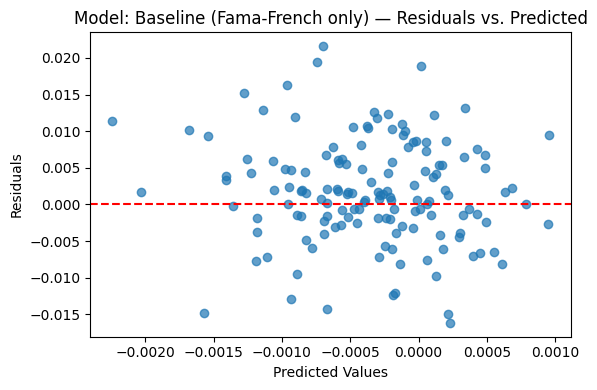


[2] Multicollinearity (VIF)
  Feature        VIF
0  Mkt-RF  21.330575
1     SMB   7.366871
2     HML  20.817317

[3] Homoscedasticity (Breusch-Pagan Test)
{'Lagrange Multiplier stat': np.float64(3.0208712932802935), 'p-value': np.float64(0.3884184141147394), 'f-value': np.float64(1.0000614017954492), 'f p-value': np.float64(0.39482232446191684)}

[4] Autocorrelation (Durbin-Watson)
Durbin-Watson Statistic: 1.801 (ideal ~2.0)

[5] Normality of Residuals


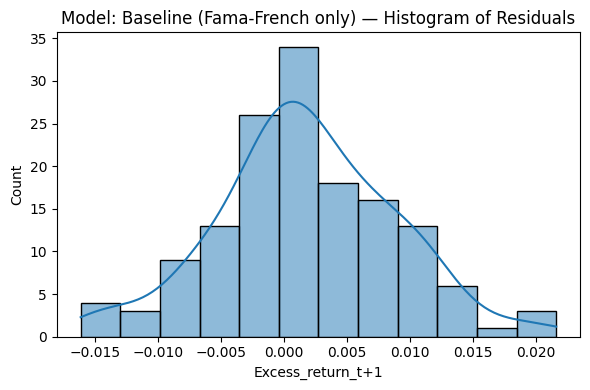

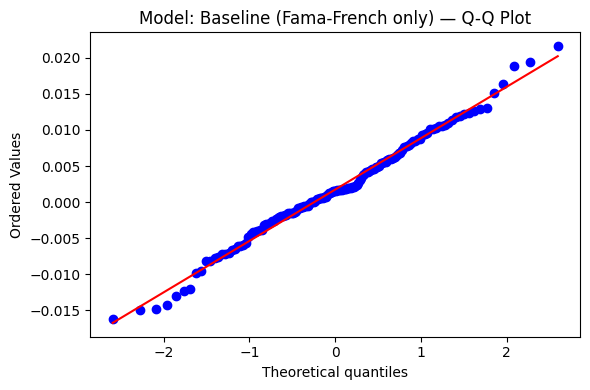

Shapiro-Wilk Test p-value: 0.5499

--------------------------------------------------
Conclusion Summary — Model: Baseline (Fama-French only)
--------------------------------------------------
Linearity: Check residuals plot visually. Look for random scatter.
Multicollinearity: ⚠️ Problem: 3 feature(s) with VIF > 3
Homoscedasticity: ✅ p-value = 0.3884 (no heteroscedasticity)
Autocorrelation: ✅ DW = 1.801
Normality: ✅ p-value = 0.5499


=== Evaluating Model: Sentiment_score ===
Training rows: 459 | Validation rows: 146

Checking OLS Assumptions — Model: Sentiment_score

[1] Linearity (Residuals vs. Predicted)


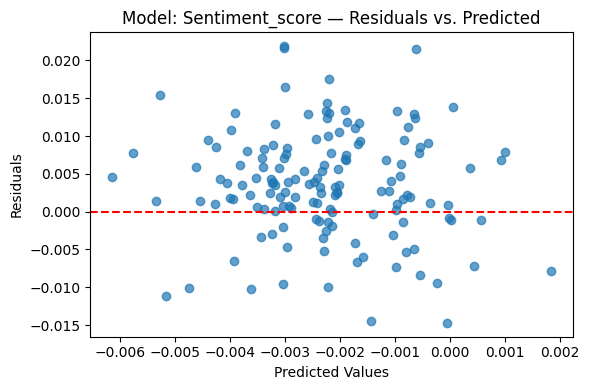


[2] Multicollinearity (VIF)
           Feature        VIF
0           Mkt-RF  32.002385
1              SMB   7.460101
2              HML  22.596325
3  Sentiment_score  19.435709

[3] Homoscedasticity (Breusch-Pagan Test)
{'Lagrange Multiplier stat': np.float64(2.4727611132908613), 'p-value': np.float64(0.6495198894994478), 'f-value': np.float64(0.6073051353848251), 'f p-value': np.float64(0.6580187047540054)}

[4] Autocorrelation (Durbin-Watson)
Durbin-Watson Statistic: 1.492 (ideal ~2.0)

[5] Normality of Residuals


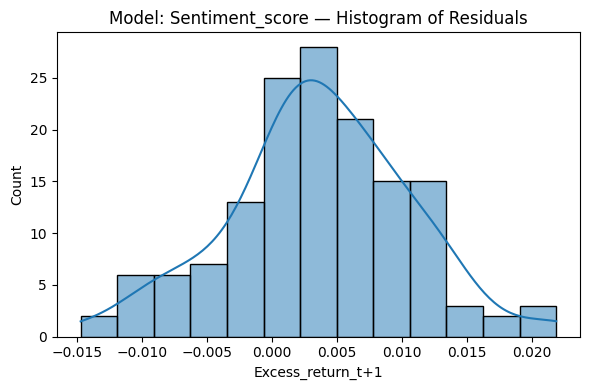

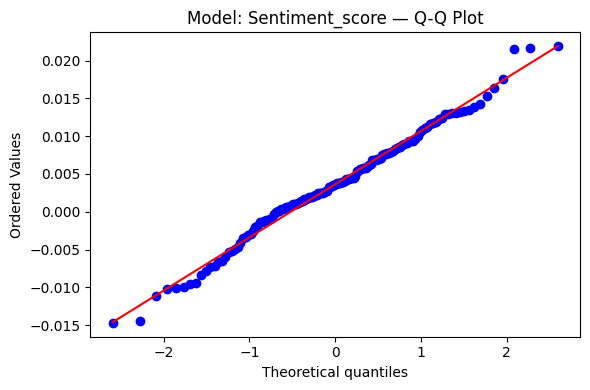

Shapiro-Wilk Test p-value: 0.4210

--------------------------------------------------
Conclusion Summary — Model: Sentiment_score
--------------------------------------------------
Linearity: Check residuals plot visually. Look for random scatter.
Multicollinearity: ⚠️ Problem: 4 feature(s) with VIF > 3
Homoscedasticity: ✅ p-value = 0.6495 (no heteroscedasticity)
Autocorrelation: ⚠️ Problem: DW = 1.492
Normality: ✅ p-value = 0.4210


=== Evaluating Model: IWSS_Equal ===
Training rows: 459 | Validation rows: 146

Checking OLS Assumptions — Model: IWSS_Equal

[1] Linearity (Residuals vs. Predicted)


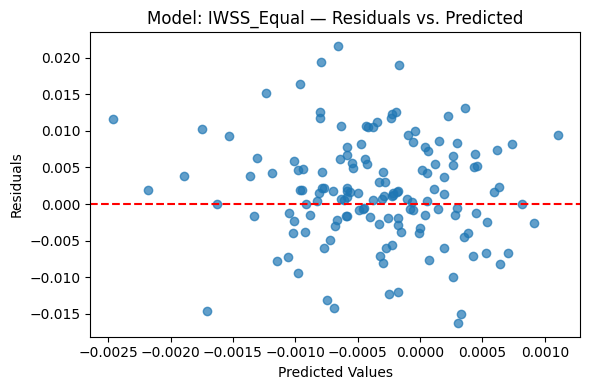


[2] Multicollinearity (VIF)
      Feature        VIF
0      Mkt-RF  44.268295
1         SMB   8.370822
2         HML  36.766442
3  IWSS_Equal  61.891744

[3] Homoscedasticity (Breusch-Pagan Test)
{'Lagrange Multiplier stat': np.float64(4.203313356608896), 'p-value': np.float64(0.3791890835187903), 'f-value': np.float64(1.0449242456073249), 'f p-value': np.float64(0.38634880425225343)}

[4] Autocorrelation (Durbin-Watson)
Durbin-Watson Statistic: 1.794 (ideal ~2.0)

[5] Normality of Residuals


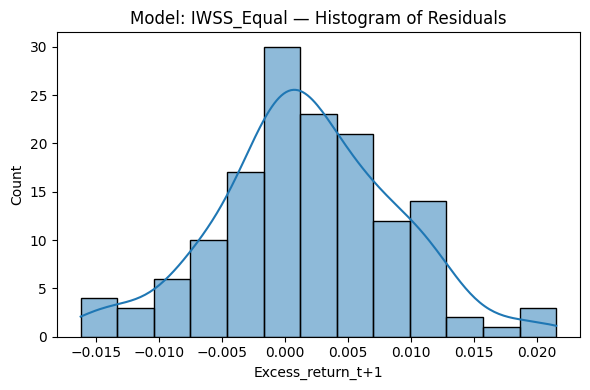

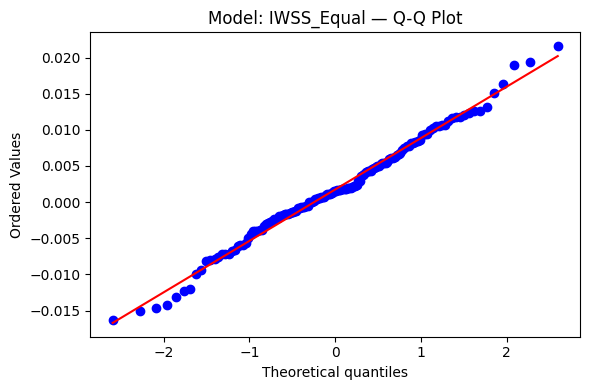

Shapiro-Wilk Test p-value: 0.5065

--------------------------------------------------
Conclusion Summary — Model: IWSS_Equal
--------------------------------------------------
Linearity: Check residuals plot visually. Look for random scatter.
Multicollinearity: ⚠️ Problem: 4 feature(s) with VIF > 3
Homoscedasticity: ✅ p-value = 0.3792 (no heteroscedasticity)
Autocorrelation: ✅ DW = 1.794
Normality: ✅ p-value = 0.5065


=== Evaluating Model: IWSS_Ratio ===
Training rows: 459 | Validation rows: 146

Checking OLS Assumptions — Model: IWSS_Ratio

[1] Linearity (Residuals vs. Predicted)


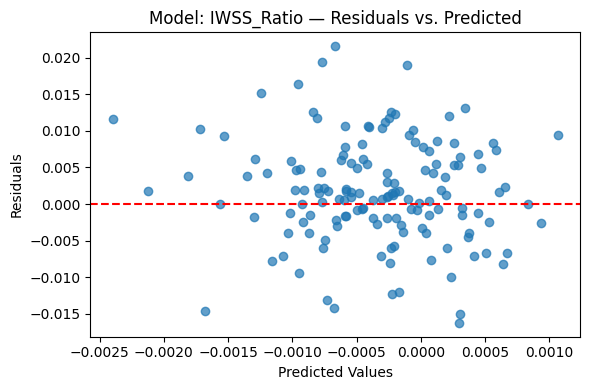


[2] Multicollinearity (VIF)
      Feature        VIF
0      Mkt-RF  44.283868
1         SMB   8.384261
2         HML  36.437978
3  IWSS_Ratio  61.184618

[3] Homoscedasticity (Breusch-Pagan Test)
{'Lagrange Multiplier stat': np.float64(4.219524170877336), 'p-value': np.float64(0.3771109408422574), 'f-value': np.float64(1.0490741137213364), 'f p-value': np.float64(0.38423742328851646)}

[4] Autocorrelation (Durbin-Watson)
Durbin-Watson Statistic: 1.796 (ideal ~2.0)

[5] Normality of Residuals


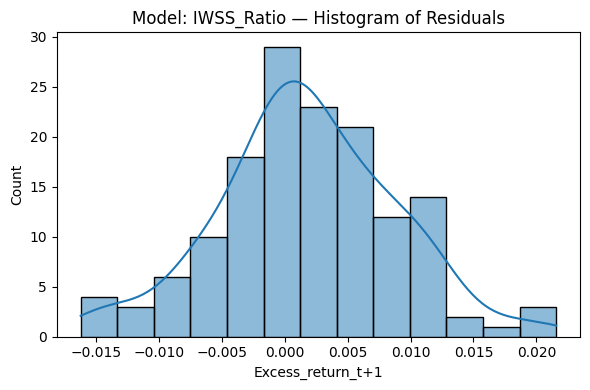

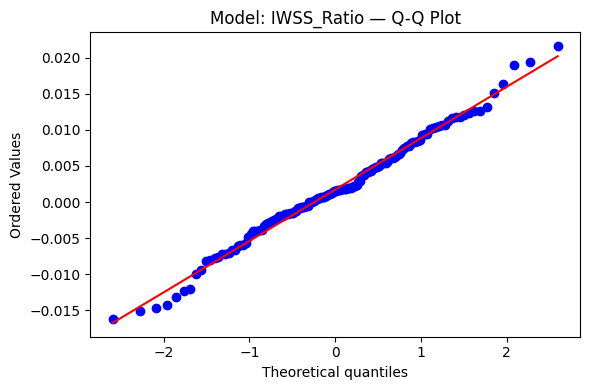

Shapiro-Wilk Test p-value: 0.5125

--------------------------------------------------
Conclusion Summary — Model: IWSS_Ratio
--------------------------------------------------
Linearity: Check residuals plot visually. Look for random scatter.
Multicollinearity: ⚠️ Problem: 4 feature(s) with VIF > 3
Homoscedasticity: ✅ p-value = 0.3771 (no heteroscedasticity)
Autocorrelation: ✅ DW = 1.796
Normality: ✅ p-value = 0.5125


=== Evaluating Model: IWSS_Impurity ===
Training rows: 459 | Validation rows: 146

Checking OLS Assumptions — Model: IWSS_Impurity

[1] Linearity (Residuals vs. Predicted)


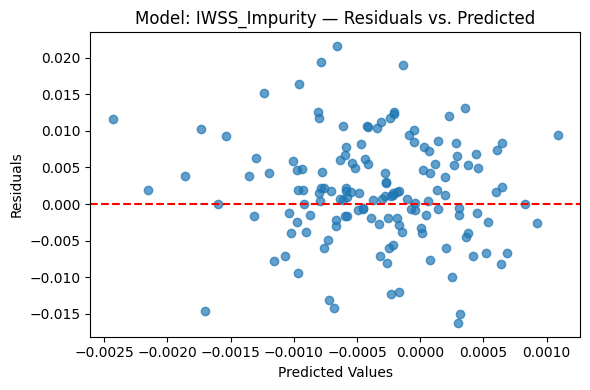


[2] Multicollinearity (VIF)
         Feature        VIF
0         Mkt-RF  44.453979
1            SMB   8.383835
2            HML  36.732828
3  IWSS_Impurity  62.034630

[3] Homoscedasticity (Breusch-Pagan Test)
{'Lagrange Multiplier stat': np.float64(4.22574266178226), 'p-value': np.float64(0.37631610909452107), 'f-value': np.float64(1.0506662607476807), 'f p-value': np.float64(0.38342978987095194)}

[4] Autocorrelation (Durbin-Watson)
Durbin-Watson Statistic: 1.795 (ideal ~2.0)

[5] Normality of Residuals


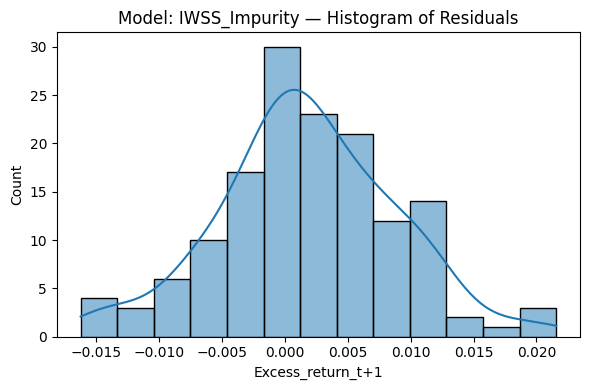

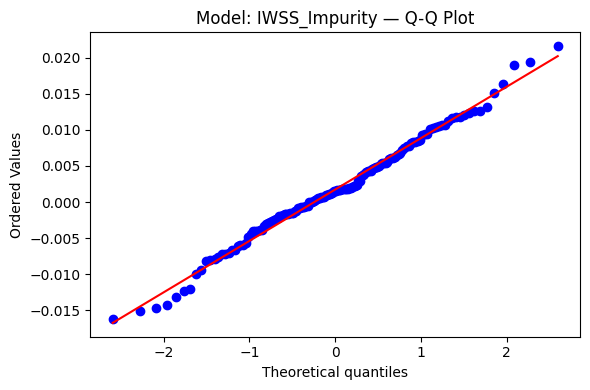

Shapiro-Wilk Test p-value: 0.5083

--------------------------------------------------
Conclusion Summary — Model: IWSS_Impurity
--------------------------------------------------
Linearity: Check residuals plot visually. Look for random scatter.
Multicollinearity: ⚠️ Problem: 4 feature(s) with VIF > 3
Homoscedasticity: ✅ p-value = 0.3763 (no heteroscedasticity)
Autocorrelation: ✅ DW = 1.795
Normality: ✅ p-value = 0.5083


=== Evaluating Model: IWSS_perm ===
Training rows: 459 | Validation rows: 146

Checking OLS Assumptions — Model: IWSS_perm

[1] Linearity (Residuals vs. Predicted)


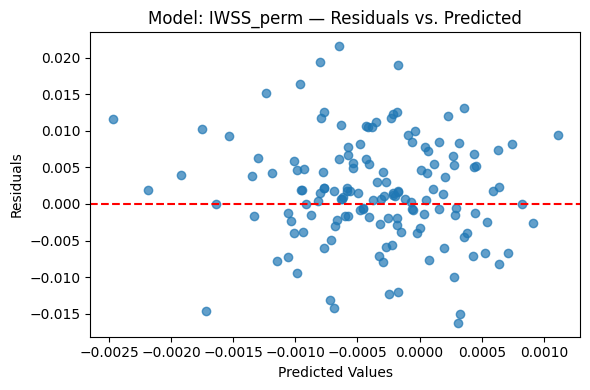


[2] Multicollinearity (VIF)
     Feature        VIF
0     Mkt-RF  44.709767
1        SMB   8.384666
2        HML  37.109500
3  IWSS_perm  63.172537

[3] Homoscedasticity (Breusch-Pagan Test)
{'Lagrange Multiplier stat': np.float64(4.238363902402566), 'p-value': np.float64(0.37470689240597316), 'f-value': np.float64(1.0538981608312759), 'f p-value': np.float64(0.38179450436303064)}

[4] Autocorrelation (Durbin-Watson)
Durbin-Watson Statistic: 1.794 (ideal ~2.0)

[5] Normality of Residuals


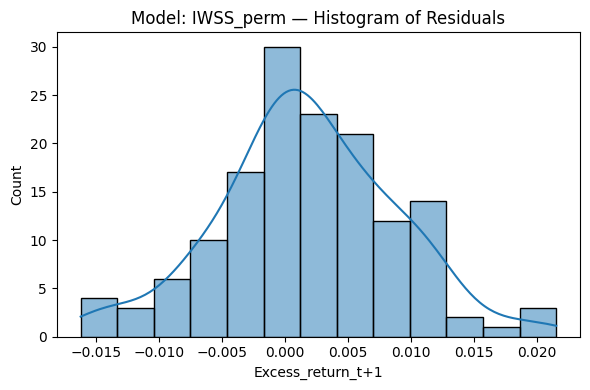

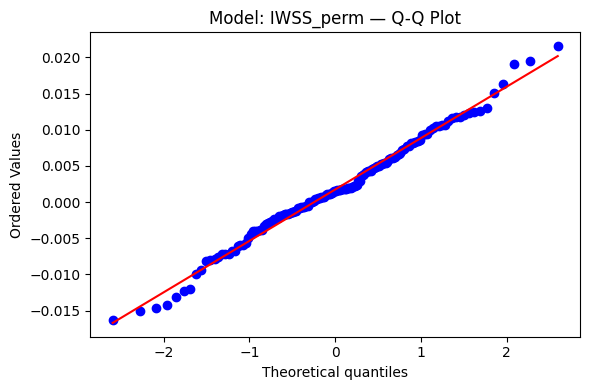

Shapiro-Wilk Test p-value: 0.5029

--------------------------------------------------
Conclusion Summary — Model: IWSS_perm
--------------------------------------------------
Linearity: Check residuals plot visually. Look for random scatter.
Multicollinearity: ⚠️ Problem: 4 feature(s) with VIF > 3
Homoscedasticity: ✅ p-value = 0.3747 (no heteroscedasticity)
Autocorrelation: ✅ DW = 1.794
Normality: ✅ p-value = 0.5029


=== Evaluating Model: IWSS_SHAP ===
Training rows: 459 | Validation rows: 146

Checking OLS Assumptions — Model: IWSS_SHAP

[1] Linearity (Residuals vs. Predicted)


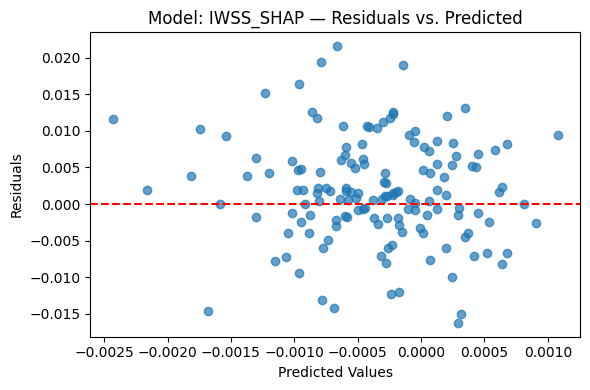


[2] Multicollinearity (VIF)
     Feature        VIF
0     Mkt-RF  43.366214
1        SMB   8.345128
2        HML  35.984645
3  IWSS_SHAP  59.100152

[3] Homoscedasticity (Breusch-Pagan Test)
{'Lagrange Multiplier stat': np.float64(4.144024752733768), 'p-value': np.float64(0.3868649813125633), 'f-value': np.float64(1.0297548078552323), 'f p-value': np.float64(0.3941445494288444)}

[4] Autocorrelation (Durbin-Watson)
Durbin-Watson Statistic: 1.795 (ideal ~2.0)

[5] Normality of Residuals


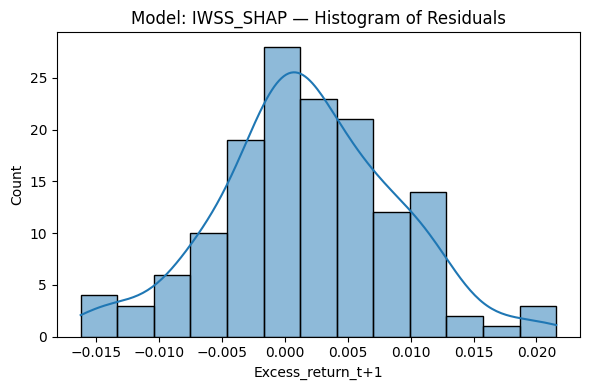

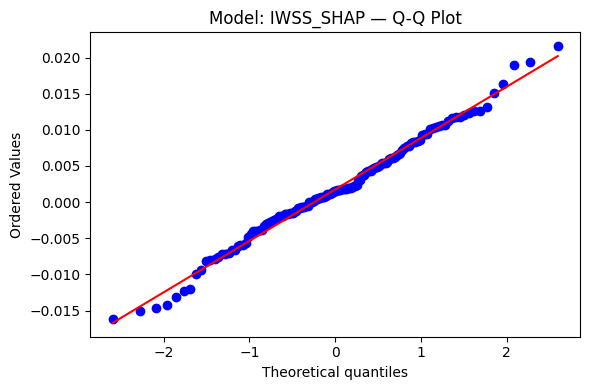

Shapiro-Wilk Test p-value: 0.5145

--------------------------------------------------
Conclusion Summary — Model: IWSS_SHAP
--------------------------------------------------
Linearity: Check residuals plot visually. Look for random scatter.
Multicollinearity: ⚠️ Problem: 4 feature(s) with VIF > 3
Homoscedasticity: ✅ p-value = 0.3869 (no heteroscedasticity)
Autocorrelation: ✅ DW = 1.795
Normality: ✅ p-value = 0.5145


======== Summary Results ========
             Sentiment Feature      MSE     RMSE      MAE      R^2     ROOS  \
0  Baseline (Fama-French only)  0.00005  0.00726  0.00559 -0.07358 -0.01260   
1              Sentiment_score  0.00006  0.00787  0.00627 -0.26162 -0.18996   
2                   IWSS_Equal  0.00005  0.00725  0.00558 -0.07114 -0.01030   
3                   IWSS_Ratio  0.00005  0.00725  0.00558 -0.07107 -0.01023   
4                IWSS_Impurity  0.00005  0.00725  0.00558 -0.07098 -0.01015   
5                    IWSS_perm  0.00005  0.00725  0.00558 -0.07088 -0.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

results = []

# All features
sentiment_features = ['Sentiment_score', 'IWSS_Equal', 'IWSS_Ratio',
                      'IWSS_Impurity', 'IWSS_perm', 'IWSS_SHAP']
fama_french_factors = ['Mkt-RF', 'SMB', 'HML']

# Combine baseline + sentiment features (None means baseline model)
for sentiment_col in [None] + sentiment_features:
    label = sentiment_col if sentiment_col else 'Baseline (Fama-French only)'
    print(f"\n\n=== Evaluating Model: {label} ===")

    # Use only Fama-French if no sentiment
    features = fama_french_factors if sentiment_col is None else fama_french_factors + [sentiment_col]

    # Select and drop rows with NaNs
    train_data = merged_train[features + ['Excess_return_t+1']].dropna()
    val_data = merged_val[features + ['Excess_return_t+1']].dropna()

    print(f"Training rows: {len(train_data)} | Validation rows: {len(val_data)}")

    if train_data.empty or val_data.empty:
        print(f"⚠️ Skipping {label}: no data left after dropna.")
        continue

    X_train = train_data[features]
    y_train = train_data['Excess_return_t+1']
    X_val = val_data[features]
    y_val = val_data['Excess_return_t+1']

    # Scale with MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Train OLS
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_val_scaled)
    residuals = y_val - y_pred

    # Metrics
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    train_mean = np.mean(y_train)
    roos = 1 - (np.sum((y_val - y_pred) ** 2) / np.sum((y_val - train_mean) ** 2))
    correct_sign = np.sum(np.sign(y_val) == np.sign(y_pred))
    directional_accuracy = np.mean(np.sign(y_val) == np.sign(y_pred)) * 100

    results.append({
        'Sentiment Feature': label,
        'MSE': round(mse, 5),
        'RMSE': round(rmse, 5),
        'MAE': round(mae, 5),
        'R^2': round(r2, 5),
        'ROOS': round(roos, 5),
        'Correct sign': int(correct_sign),
        'Directional accuracy (%)': round(directional_accuracy, 5)
    })

    # Assumption checks
    check_ols_assumptions(
        X_val_scaled,
        y_val,
        y_pred,
        residuals,
        features,
        label=label
    )

# Final results table
results_df = pd.DataFrame(results)
print("\n\n======== Summary Results ========")
print(results_df)




--- Evaluating Model with: Sentiment_score ---

Checking OLS Assumptions — Model: Sentiment_score

[1] Linearity (Residuals vs. Predicted)


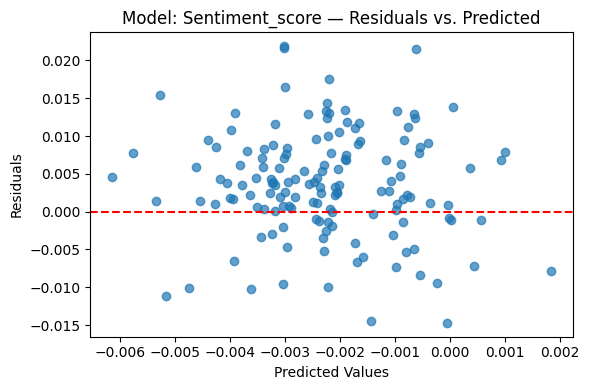


[2] Multicollinearity (VIF)
           Feature        VIF
0           Mkt-RF  32.002385
1              SMB   7.460101
2              HML  22.596325
3  Sentiment_score  19.435709

[3] Homoscedasticity (Breusch-Pagan Test)
{'Lagrange Multiplier stat': np.float64(2.4727611132908613), 'p-value': np.float64(0.6495198894994478), 'f-value': np.float64(0.6073051353848251), 'f p-value': np.float64(0.6580187047540054)}

[4] Autocorrelation (Durbin-Watson)
Durbin-Watson Statistic: 1.492 (ideal ~2.0)

[5] Normality of Residuals


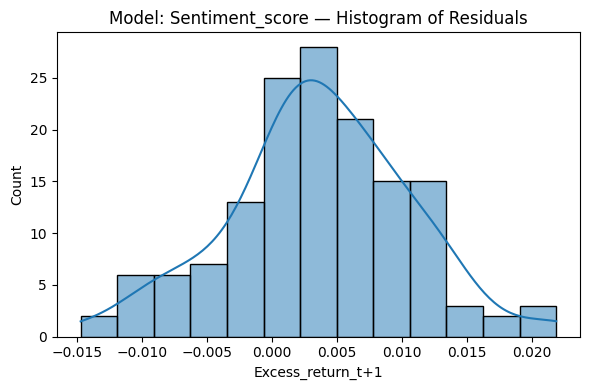

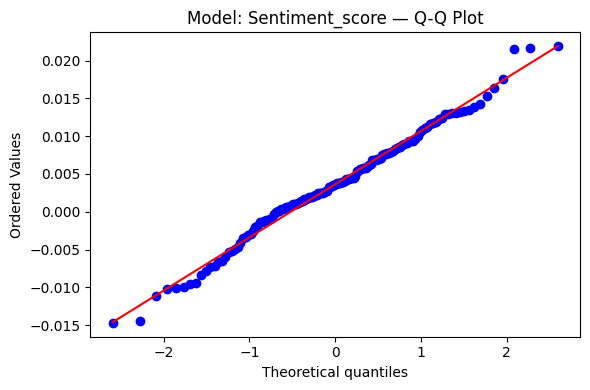

Shapiro-Wilk Test p-value: 0.4210

--------------------------------------------------
Conclusion Summary — Model: Sentiment_score
--------------------------------------------------
Linearity: Check residuals plot visually. Look for random scatter.
Multicollinearity: ⚠️ Problem: 4 feature(s) with VIF > 3
Homoscedasticity: ✅ p-value = 0.6495 (no heteroscedasticity)
Autocorrelation: ⚠️ Problem: DW = 1.492
Normality: ✅ p-value = 0.4210


--- Evaluating Model with: IWSS_Equal ---

Checking OLS Assumptions — Model: IWSS_Equal

[1] Linearity (Residuals vs. Predicted)


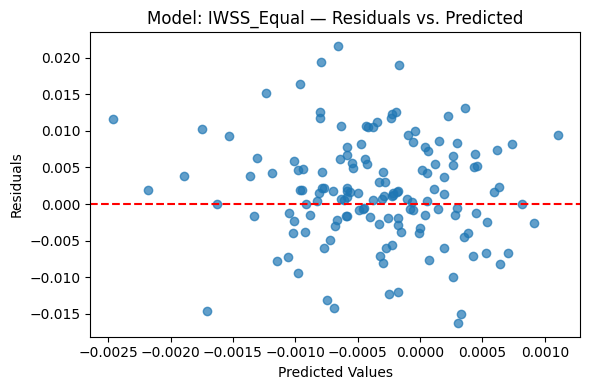


[2] Multicollinearity (VIF)
      Feature        VIF
0      Mkt-RF  44.268295
1         SMB   8.370822
2         HML  36.766442
3  IWSS_Equal  61.891744

[3] Homoscedasticity (Breusch-Pagan Test)
{'Lagrange Multiplier stat': np.float64(4.203313356608896), 'p-value': np.float64(0.3791890835187903), 'f-value': np.float64(1.0449242456073249), 'f p-value': np.float64(0.38634880425225343)}

[4] Autocorrelation (Durbin-Watson)
Durbin-Watson Statistic: 1.794 (ideal ~2.0)

[5] Normality of Residuals


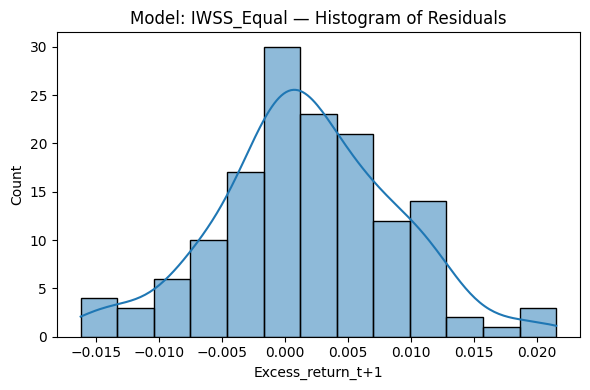

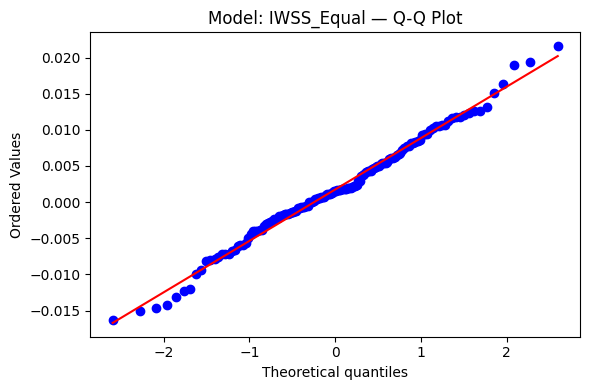

Shapiro-Wilk Test p-value: 0.5065

--------------------------------------------------
Conclusion Summary — Model: IWSS_Equal
--------------------------------------------------
Linearity: Check residuals plot visually. Look for random scatter.
Multicollinearity: ⚠️ Problem: 4 feature(s) with VIF > 3
Homoscedasticity: ✅ p-value = 0.3792 (no heteroscedasticity)
Autocorrelation: ✅ DW = 1.794
Normality: ✅ p-value = 0.5065


--- Evaluating Model with: IWSS_Ratio ---

Checking OLS Assumptions — Model: IWSS_Ratio

[1] Linearity (Residuals vs. Predicted)


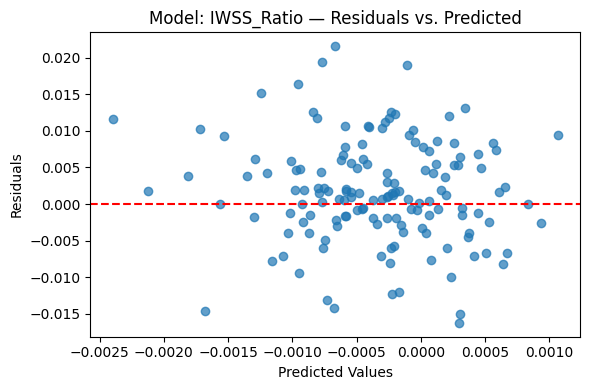


[2] Multicollinearity (VIF)
      Feature        VIF
0      Mkt-RF  44.283868
1         SMB   8.384261
2         HML  36.437978
3  IWSS_Ratio  61.184618

[3] Homoscedasticity (Breusch-Pagan Test)
{'Lagrange Multiplier stat': np.float64(4.219524170877336), 'p-value': np.float64(0.3771109408422574), 'f-value': np.float64(1.0490741137213364), 'f p-value': np.float64(0.38423742328851646)}

[4] Autocorrelation (Durbin-Watson)
Durbin-Watson Statistic: 1.796 (ideal ~2.0)

[5] Normality of Residuals


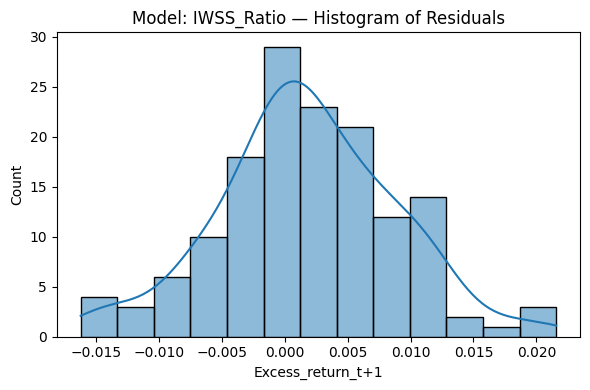

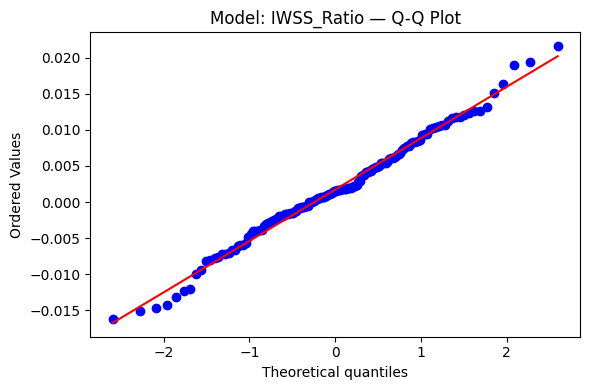

Shapiro-Wilk Test p-value: 0.5125

--------------------------------------------------
Conclusion Summary — Model: IWSS_Ratio
--------------------------------------------------
Linearity: Check residuals plot visually. Look for random scatter.
Multicollinearity: ⚠️ Problem: 4 feature(s) with VIF > 3
Homoscedasticity: ✅ p-value = 0.3771 (no heteroscedasticity)
Autocorrelation: ✅ DW = 1.796
Normality: ✅ p-value = 0.5125


--- Evaluating Model with: IWSS_Impurity ---

Checking OLS Assumptions — Model: IWSS_Impurity

[1] Linearity (Residuals vs. Predicted)


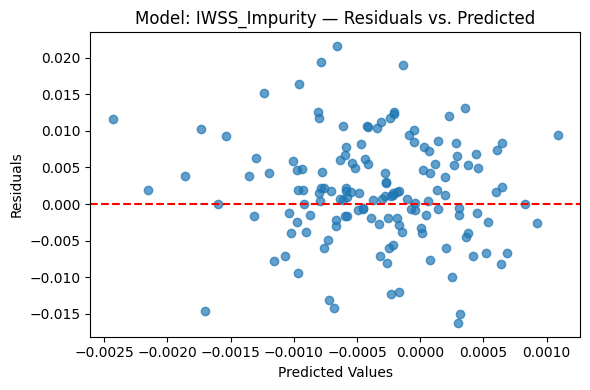


[2] Multicollinearity (VIF)
         Feature        VIF
0         Mkt-RF  44.453979
1            SMB   8.383835
2            HML  36.732828
3  IWSS_Impurity  62.034630

[3] Homoscedasticity (Breusch-Pagan Test)
{'Lagrange Multiplier stat': np.float64(4.22574266178226), 'p-value': np.float64(0.37631610909452107), 'f-value': np.float64(1.0506662607476807), 'f p-value': np.float64(0.38342978987095194)}

[4] Autocorrelation (Durbin-Watson)
Durbin-Watson Statistic: 1.795 (ideal ~2.0)

[5] Normality of Residuals


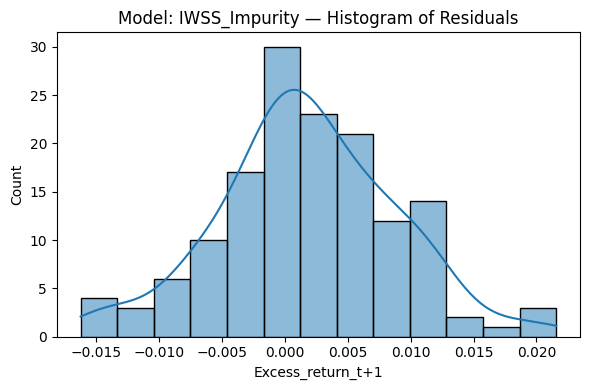

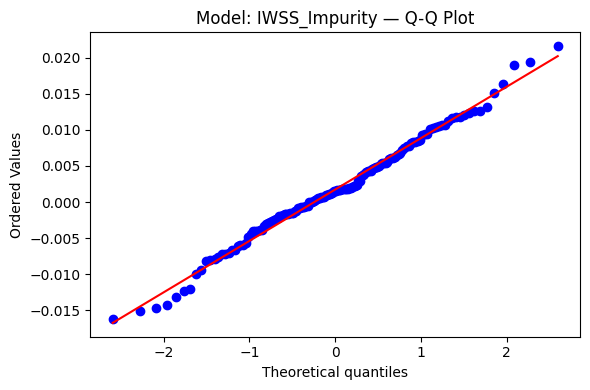

Shapiro-Wilk Test p-value: 0.5083

--------------------------------------------------
Conclusion Summary — Model: IWSS_Impurity
--------------------------------------------------
Linearity: Check residuals plot visually. Look for random scatter.
Multicollinearity: ⚠️ Problem: 4 feature(s) with VIF > 3
Homoscedasticity: ✅ p-value = 0.3763 (no heteroscedasticity)
Autocorrelation: ✅ DW = 1.795
Normality: ✅ p-value = 0.5083


--- Evaluating Model with: IWSS_perm ---

Checking OLS Assumptions — Model: IWSS_perm

[1] Linearity (Residuals vs. Predicted)


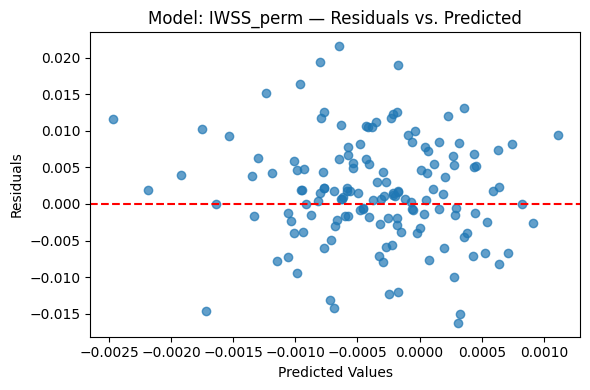


[2] Multicollinearity (VIF)
     Feature        VIF
0     Mkt-RF  44.709767
1        SMB   8.384666
2        HML  37.109500
3  IWSS_perm  63.172537

[3] Homoscedasticity (Breusch-Pagan Test)
{'Lagrange Multiplier stat': np.float64(4.238363902402566), 'p-value': np.float64(0.37470689240597316), 'f-value': np.float64(1.0538981608312759), 'f p-value': np.float64(0.38179450436303064)}

[4] Autocorrelation (Durbin-Watson)
Durbin-Watson Statistic: 1.794 (ideal ~2.0)

[5] Normality of Residuals


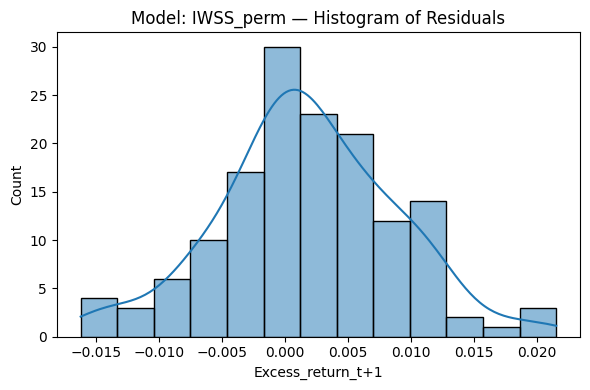

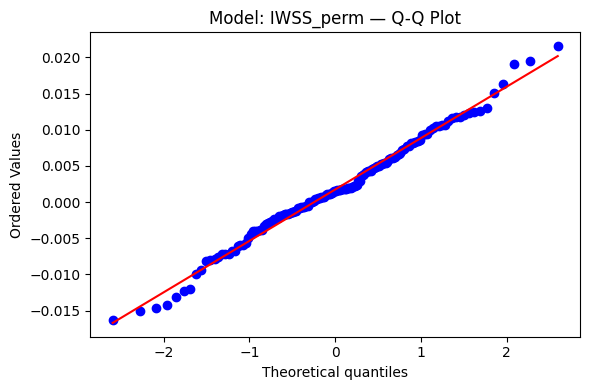

Shapiro-Wilk Test p-value: 0.5029

--------------------------------------------------
Conclusion Summary — Model: IWSS_perm
--------------------------------------------------
Linearity: Check residuals plot visually. Look for random scatter.
Multicollinearity: ⚠️ Problem: 4 feature(s) with VIF > 3
Homoscedasticity: ✅ p-value = 0.3747 (no heteroscedasticity)
Autocorrelation: ✅ DW = 1.794
Normality: ✅ p-value = 0.5029


--- Evaluating Model with: IWSS_SHAP ---

Checking OLS Assumptions — Model: IWSS_SHAP

[1] Linearity (Residuals vs. Predicted)


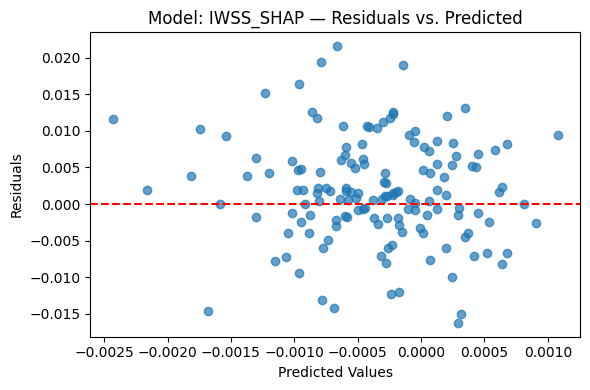


[2] Multicollinearity (VIF)
     Feature        VIF
0     Mkt-RF  43.366214
1        SMB   8.345128
2        HML  35.984645
3  IWSS_SHAP  59.100152

[3] Homoscedasticity (Breusch-Pagan Test)
{'Lagrange Multiplier stat': np.float64(4.144024752733768), 'p-value': np.float64(0.3868649813125633), 'f-value': np.float64(1.0297548078552323), 'f p-value': np.float64(0.3941445494288444)}

[4] Autocorrelation (Durbin-Watson)
Durbin-Watson Statistic: 1.795 (ideal ~2.0)

[5] Normality of Residuals


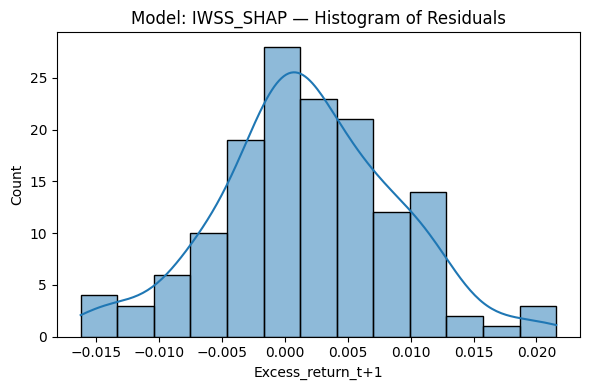

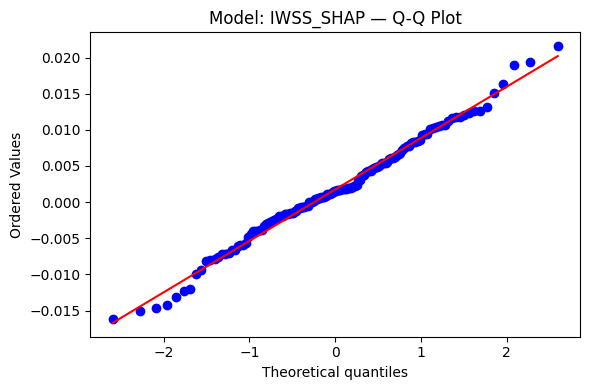

Shapiro-Wilk Test p-value: 0.5145

--------------------------------------------------
Conclusion Summary — Model: IWSS_SHAP
--------------------------------------------------
Linearity: Check residuals plot visually. Look for random scatter.
Multicollinearity: ⚠️ Problem: 4 feature(s) with VIF > 3
Homoscedasticity: ✅ p-value = 0.3869 (no heteroscedasticity)
Autocorrelation: ✅ DW = 1.795
Normality: ✅ p-value = 0.5145


In [19]:
results = []

for sentiment_col in sentiment_features:
    print(f"\n\n--- Evaluating Model with: {sentiment_col} ---")

    features = fama_french_factors + [sentiment_col]

    train_data = merged_train[features + ['Excess_return_t+1']].dropna()
    val_data = merged_val[features + ['Excess_return_t+1']].dropna()

    if train_data.empty or val_data.empty:
        print(f"Skipping {sentiment_col}: no data left after dropna.")
        continue

    X_train = train_data[features]
    y_train = train_data['Excess_return_t+1']
    X_val = val_data[features]
    y_val = val_data['Excess_return_t+1']

    # Standardize
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # OLS Model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_val_scaled)
    residuals = y_val - y_pred

    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    train_mean = np.mean(y_train)
    roos = 1 - (np.sum((y_val - y_pred) ** 2) / np.sum((y_val - train_mean) ** 2))
    correct_sign = np.sum(np.sign(y_val) == np.sign(y_pred))
    directional_accuracy = np.mean(np.sign(y_val) == np.sign(y_pred)) * 100

    results.append({
        'Sentiment Feature': sentiment_col,
        'MSE': round(mse, 5),
        'RMSE': round(rmse, 5),
        'MAE': round(mae, 5),
        'R^2': round(r2, 5),
        'ROOS': round(roos, 5),
        'Correct sign': int(correct_sign),
        'Directional accuracy (%)': round(directional_accuracy, 5)
    })

    # Assumptions check
    check_ols_assumptions(
        X_val_scaled,
        y_val,
        y_pred,
        residuals,
        features,
        label=sentiment_col
    )

In [26]:
df = merged_train.copy()

In [28]:
import statsmodels.api as sm
import pandas as pd

# Drop any missing values
df = df.dropna(subset=['Excess_return_t+1', 'Mkt-RF', 'SMB', 'HML'])

# Define X (factors) and y (target)
X = df[['Mkt-RF', 'SMB', 'HML']]
y = df['Excess_return_t+1']

# Add intercept to the model
X = sm.add_constant(X)

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Excess_return_t+1   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.011
Date:                Wed, 07 May 2025   Prob (F-statistic):              0.388
Time:                        14:41:27   Log-Likelihood:                 1357.5
No. Observations:                 459   AIC:                            -2707.
Df Residuals:                     455   BIC:                            -2690.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.514      0.6